## Importing libraries

In [1]:
import json
import math
import os
import cv2
from PIL import Image
from PIL import ImageEnhance
import numpy as np
from keras import layers
from keras.applications import ResNet50, VGG16,DenseNet121, InceptionV3
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
from keras.models import model_from_json
from keras.models import load_model
import shutil
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

%matplotlib inline

In [2]:
# Path of dataset
base = '../input/skin-cancer-malignant-vs-benign/' 

In [3]:
#Folders for storing preprocessed images
enh = 'enh'
os.mkdir(enh)

train = os.path.join(enh,'train')
os.mkdir(train)

test = os.path.join(enh,'test')
os.mkdir(test)

os.mkdir(os.path.join(train,'benign'))
os.mkdir(os.path.join(train,'malignant'))
os.mkdir(os.path.join(test,'benign'))
os.mkdir(os.path.join(test,'malignant'))

In [4]:
for k in os.listdir(os.path.join(base,'train')):
    for i in tqdm(os.listdir(os.path.join(base,'train',k))):
        image = Image.open(os.path.join(base,'train',k,i))
        curr_col = ImageEnhance.Color(image)
        new_col = 1.2
        img_colored = curr_col.enhance(new_col)
        # Enhance Sharpness
        curr_sharp = ImageEnhance.Contrast(img_colored)
        new_sharp = 1.2
        # Sharpness enhanced by a factor of 1.2
        img_sharped = curr_sharp.enhance(new_sharp)
        img_sharped.save(os.path.join(enh,"train",k,i))
        
for k in os.listdir(os.path.join(base,'test')):
    for i in tqdm(os.listdir(os.path.join(base,'test',k))):
        image = Image.open(os.path.join(base,'test',k,i))
        curr_col = ImageEnhance.Color(image)
        new_col = 1.2
        img_colored = curr_col.enhance(new_col)
        # Enhance Sharpness
        curr_sharp = ImageEnhance.Contrast(img_colored)
        new_sharp = 1.2
        # Sharpness enhanced by a factor of 1.2
        img_sharped = curr_sharp.enhance(new_sharp)
        img_sharped.save(os.path.join(enh,"test",k,i))
        

100%|██████████| 300/300 [00:02<00:00, 101.49it/s]


## Hair Removal

In [5]:
#Folders for storing preprocessed images
data = 'data'
os.mkdir(data)

train = os.path.join(data,'train')
os.mkdir(train)

test = os.path.join(data,'test')
os.mkdir(test)

os.mkdir(os.path.join(train,'benign'))
os.mkdir(os.path.join(train,'malignant'))
os.mkdir(os.path.join(test,'benign'))
os.mkdir(os.path.join(test,'malignant'))

In [6]:


kernel = cv2.getStructuringElement(1,(17,17))
# Hair removal for training data

for k in os.listdir(os.path.join(enh,'train')):
    for i in tqdm(os.listdir(os.path.join(enh,'train',k))):
        img = cv2.imread(os.path.join(enh,'train',k,i))
        grayScale = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY )
        blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
        ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
        dst = cv2.inpaint(img,thresh2,1,cv2.INPAINT_TELEA)
        rgb = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
        im = Image.fromarray(rgb)
        im.save(os.path.join(data,"train",k,i))
       
        
# Hair removal for testing data
    
for k in os.listdir(os.path.join(enh,'test')):
    for i in tqdm(os.listdir(os.path.join(enh,'test',k))):
        img = cv2.imread(os.path.join(enh,'test',k,i))
        grayScale = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY )
        blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
        ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
        dst = cv2.inpaint(img,thresh2,1,cv2.INPAINT_TELEA)
        rgb = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
        im = Image.fromarray(rgb)
        im.save(os.path.join(data,"test",k,i))
       

100%|██████████| 360/360 [00:07<00:00, 45.32it/s]


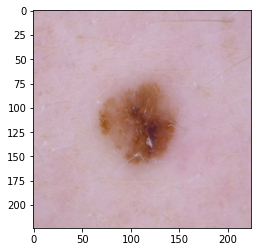

In [7]:
img = plt.imread('../input/skin-cancer-malignant-vs-benign/train/malignant/1411.jpg')
im = Image.fromarray(img)
im.save('img3.jpg')
plt.imshow(img)
plt.show()

In [8]:
kernel = cv2.getStructuringElement(1,(17,17))

img1 = cv2.imread('../input/skin-cancer-malignant-vs-benign/train/benign/1161.jpg')
grayScale1 = cv2.cvtColor( img1, cv2.COLOR_RGB2GRAY )
r = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
im = Image.fromarray(r)
im.save(os.path.join('img2.tif'),dpi=(600, 600))

im = Image.fromarray(grayScale1)
im.save(os.path.join('img2_gray.tif'),dpi=(600, 600))

blackhat1 = cv2.morphologyEx(grayScale1, cv2.MORPH_BLACKHAT, kernel)

im = Image.fromarray(blackhat1)
im.save(os.path.join('img2_blac.tif'),dpi=(600, 600))

ret,thresh1 = cv2.threshold(blackhat1,10,255,cv2.THRESH_BINARY)

im = Image.fromarray(thresh1)
im.save(os.path.join('img2_thre.tif'),dpi=(600, 600))

dst1 = cv2.inpaint(img1,thresh1,1,cv2.INPAINT_TELEA)
rgb1 = cv2.cvtColor(dst1,cv2.COLOR_BGR2RGB)

im = Image.fromarray(rgb1)
im.save(os.path.join('img2_inpaint.tif'),dpi=(600, 600))



In [9]:
img = cv2.imread('../input/skin-cancer-malignant-vs-benign/train/malignant/1411.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
r = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im1 = Image.fromarray(r)
im1.save(os.path.join('seg2_img.tif'),dpi=(600, 600))

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
median = cv2.medianBlur(thresh,11)
im2 = Image.fromarray(median)
im2.save(os.path.join('seg2_thr.tif'),dpi=(600, 600))

masked = cv2.bitwise_and(img, img, mask=median)
rgb1 = cv2.cvtColor(masked,cv2.COLOR_BGR2RGB)
im3 = Image.fromarray(rgb1)
im3.save(os.path.join('seg2_mask.tif'),dpi=(600, 600))

## Data Augmentation

In [10]:
class_list = ['benign','malignant']

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('data/train/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('data/train/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'data/train/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range = 0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(128,128),
                                                    batch_size=batch_size)


        
    num_aug_images_wanted = 2000 # total number of images we want to have in each class
    
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))
    print(num_batches)

    # run the generator and create about 3000 augmented images
    for i in range(0,num_batches):
        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 1440 images belonging to 1 classes.
12
Found 1197 images belonging to 1 classes.
17


## Segmentation

In [11]:
#Folders for storing preprocessed images
seg = 'seg'
os.mkdir(seg)

train = os.path.join(seg,'train')
os.mkdir(train)

test = os.path.join(seg,'test')
os.mkdir(test)

os.mkdir(os.path.join(train,'benign'))
os.mkdir(os.path.join(train,'malignant'))
os.mkdir(os.path.join(test,'benign'))
os.mkdir(os.path.join(test,'malignant'))

In [12]:

for k in os.listdir(os.path.join(data,'train')):
    for i in tqdm(os.listdir(os.path.join(data,'train',k))):
        img = cv2.imread(os.path.join(data,'train',k,i))
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        median = cv2.medianBlur(thresh,11)
        masked = cv2.bitwise_and(img, img, mask=median)
        im = Image.fromarray(masked)
        im.save(os.path.join(seg,"train",k,i))
        
    
for k in os.listdir(os.path.join(data,'test')):    
    for i in tqdm(os.listdir(os.path.join(data,'test',k))):
        img = cv2.imread(os.path.join(data,'test',k,i))
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        median = cv2.medianBlur(thresh,11)
        masked = cv2.bitwise_and(img, img, mask=median)
        im = Image.fromarray(masked)
        im.save(os.path.join(seg,"test",k,i))
        
    

100%|██████████| 360/360 [00:01<00:00, 215.89it/s]


# Data Loading & Preparation

In [13]:
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
       
        img = read(PATH)
           
        img = cv2.resize(img, (RESIZE,RESIZE))
           
        IMG.append(np.array(img))
    return IMG

benign_train = np.array(Dataset_loader('./data/train/benign',100))
malign_train = np.array(Dataset_loader('./data/train/malignant',100))
benign_test = np.array(Dataset_loader('./data/test/benign',100))
malign_test = np.array(Dataset_loader('./data/test/malignant',100))

100%|██████████| 300/300 [00:00<00:00, 1028.38it/s]


# Create Label

In [14]:
benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test)) 

X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)
X_test = np.concatenate((benign_test, malign_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis = 0)

s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)

# Train and Evalutation split

In [15]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)

In [16]:
x_val.shape

(818, 100, 100, 3)

# Display Some Images

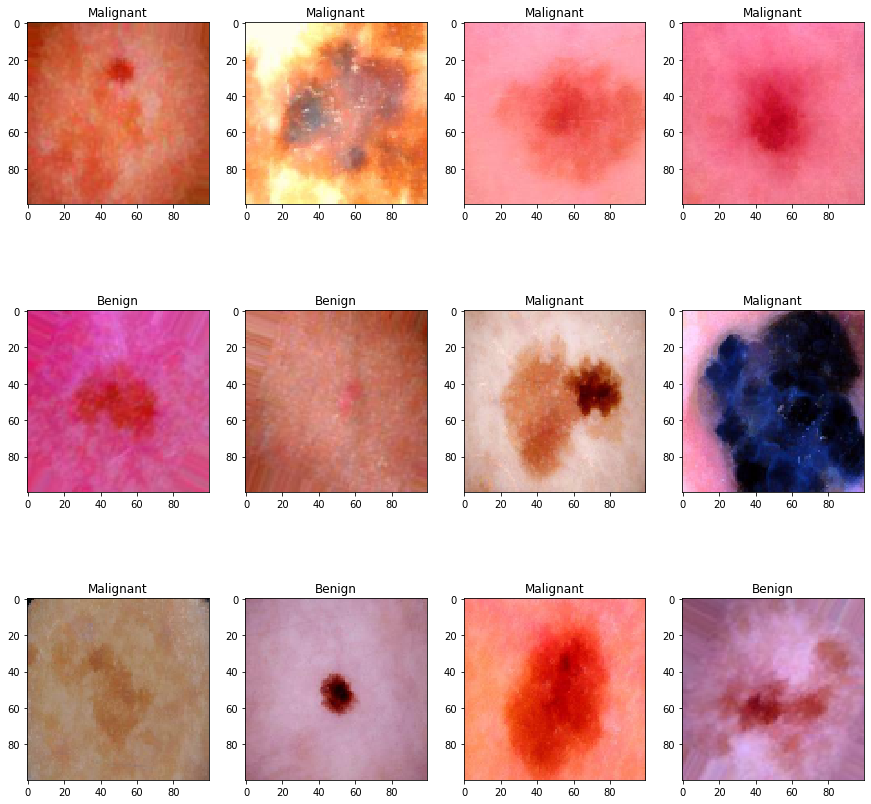

In [17]:
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')
plt.show()

# Data Generator

In [18]:
BATCH_SIZE = 64

train_generator = ImageDataGenerator(
        zoom_range=2, 
        rotation_range = 90,
        horizontal_flip=True, 
        vertical_flip=True, 
    )

# Model: ResNet50

In [19]:
def build_model(backbone, lr=5e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model

In [20]:
K.clear_session()
gc.collect()

resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(100,100,3)
)

model = build_model(resnet ,lr = 1e-4)
model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,600,002
Trainable params: 23,542,786
Non-trainable params: 57,216
_________________________________________________________________


In [21]:
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [22]:
x_train.shape

(3269, 100, 100, 3)

In [23]:
history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
51/51 [==============================] - 24s 232ms/step - loss: 0.6440 - accuracy: 0.6737 - val_loss: 0.7512 - val_accuracy: 0.6430
Epoch 2/50
51/51 [==============================] - 11s 217ms/step - loss: 0.4262 - accuracy: 0.8150 - val_loss: 1.1151 - val_accuracy: 0.6565
Epoch 3/50
51/51 [==============================] - 10s 202ms/step - loss: 0.3925 - accuracy: 0.8237 - val_loss: 0.6088 - val_accuracy: 0.7408
Epoch 4/50
51/51 [==============================] - 10s 200ms/step - loss: 0.3785 - accuracy: 0.8402 - val_loss: 0.3900 - val_accuracy: 0.8178
Epoch 5/50
51/51 [==============================] - 11s 216ms/step - loss: 0.3629 - accuracy: 0.8405 - val_loss: 0.4065 - val_accuracy: 0.8178
Epoch 6/50
51/51 [==============================] - 10s 198ms/step - loss: 0.3632 - accuracy: 0.8366 - val_loss: 0.3571 - val_accuracy: 0.8435
Epoch 7/50
51/51 [==============================] - 10s 200ms/step - loss: 0.3276 - accuracy: 0.8426 - val_loss: 0.3019 - val_accuracy: 0.8716

In [24]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# or save to csv: 
hist_csv_file = 'resnet50.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [25]:
x_val[0].shape

(100, 100, 3)

In [26]:
model.predict(x_val)

array([[1.2612973e-09, 1.0000000e+00],
       [1.0000000e+00, 6.3466690e-09],
       [9.9999583e-01, 4.1930334e-06],
       ...,
       [1.5156078e-09, 1.0000000e+00],
       [9.9994123e-01, 5.8819172e-05],
       [9.9914730e-01, 8.5268688e-04]], dtype=float32)

## Saving model

In [27]:


# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model_num_resnet.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_num_resnet.h5")

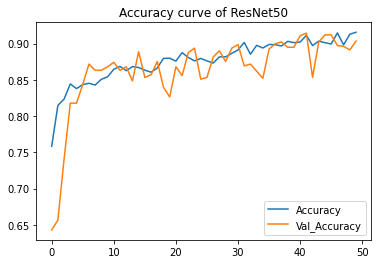

In [28]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']]
fig, ax = plt.subplots()
plt.plot(history_df[['accuracy', 'val_accuracy']])
plt.title("Accuracy curve of ResNet50")
plt.legend(['Accuracy','Val_Accuracy'])
#fig.savefig('densenet_acc.jpg', format='jpg', dpi=600)
fig.savefig('r_Acc.jpg', format='jpg', dpi=600)

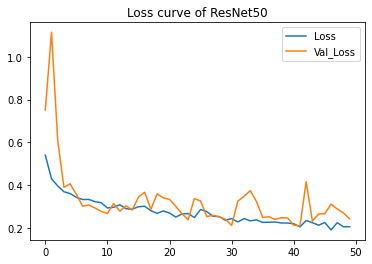

In [29]:

fig, ax = plt.subplots()
plt.plot(history_df[['loss', 'val_loss']])
plt.title("Loss curve of ResNet50")
plt.legend(['Loss','Val_Loss'])
#fig.savefig('densenet_loss.jpg', format='jpg', dpi=600)
fig.savefig('r_loss.jpg', format='jpg', dpi=600)

# Prediction

In [30]:
Y_val_pred_r = model.predict(x_val)


In [31]:
print(accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred_r, axis=1)))


0.9034229828850856


In [32]:
Y_pred_r = model.predict(X_test)


In [33]:
X_test_g = train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False)

In [34]:
Y_pred_tta_r = model.predict_generator(X_test_g)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [35]:
#Data normalization
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta_d = np.mean(predictions, axis=0)

100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


### Confusion Matrix

In [36]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    fig.savefig('confm_r.jpg', format='jpg', dpi=600)



Confusion matrix, without normalization
[[317  43]
 [ 46 254]]


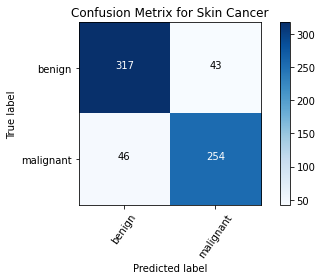

In [37]:
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred_r, axis=1))
cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

cm2

Normalized confusion matrix
[[317  43]
 [ 47 253]]


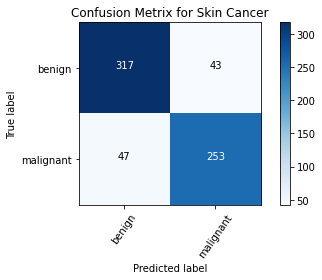

In [38]:

cm = confusion_matrix(np.argmax(Y_test, axis=1),  np.argmax(Y_pred_tta_r, axis=1))
cm_plot_label =['benign', 'malignant']

plot_confusion_matrix(cm, cm_plot_label, normalize=True, title ='Confusion Metrix for Skin Cancer')


### Classification Report

In [39]:
print(classification_report( np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta_r, axis=1)))


              precision    recall  f1-score   support

           0       0.87      0.88      0.88       360
           1       0.85      0.84      0.85       300

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660



### ROC and AUC

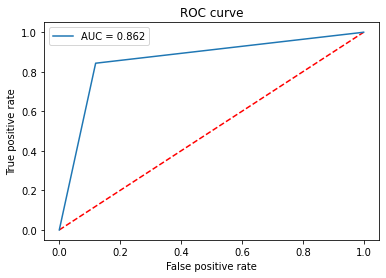

In [40]:

roc_log = roc_auc_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta_r, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta_r, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)



fig, ax = plt.subplots()

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.close()
fig.savefig('res_roc.jpg', format='jpg', dpi=600)